>[Hypothesis Testing](#HT:-Stating-the-Hypotheses=&scrollTo=P7AMKHT8YjJb)

>>[General Framework](#HT:-Stating-the-Hypotheses=&scrollTo=lKH2UOFEYjJc)

>>[One-sided Hypothesis Testing](#HT:-Stating-the-Hypotheses=&scrollTo=lYzknlveYjJe)

>>>[HT: An Example](#HT:-Stating-the-Hypotheses=&scrollTo=XETuRtbYYjJf)

>>>[Questions](#HT:-Stating-the-Hypotheses=&scrollTo=A27gmcMKYjJr)

>>[p-value: Interpretation](#HT:-Stating-the-Hypotheses=&scrollTo=ifWxueBSYjJs)

>>>[Example](#HT:-Stating-the-Hypotheses=&scrollTo=hqAyn0-KYjJt)

>>[Two-sided Hypothesis Testing](#HT:-Stating-the-Hypotheses=&scrollTo=xhXL-ZOTYjJv)

>>[HT: Stating the Hypotheses](#HT:-Stating-the-Hypotheses=&scrollTo=AJsigrTFYjJ1)

>>[Hypothesis Testing: Recap](#HT:-Stating-the-Hypotheses=&scrollTo=TSe5uZaYYjJ2)

>>[Hypothesis Testing: Small Sample](#HT:-Stating-the-Hypotheses=&scrollTo=yikhJ2hgYjJ2)

>>>[Example](#HT:-Stating-the-Hypotheses=&scrollTo=O7WONsMWYjJ8)

>>[Hypothesis Testing for Population Proportions](#HT:-Stating-the-Hypotheses=&scrollTo=oz43EA2Sfj0S)

>[Decision Errors](#HT:-Stating-the-Hypotheses=&scrollTo=lw8NRnT3FAHZ)

>[Sample Size and Power](#HT:-Stating-the-Hypotheses=&scrollTo=lJ-pSPv_FJIm)

>>[Power of the Test: An Example](#HT:-Stating-the-Hypotheses=&scrollTo=t6XIoKMo5T6o)

>>[How to Increase the Power of a Test](#HT:-Stating-the-Hypotheses=&scrollTo=yO71_8t5_6mO)

>>[Using Power to Determine Sample Size](#HT:-Stating-the-Hypotheses=&scrollTo=UKp2cLVXA9tr)



Load Modules below here...

In [0]:
#@title
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn')

from google.colab import widgets
import unicodedata

# color codes
# Titles : "slateblue"
# Examples, Exercises : "indianred"

In [0]:
#@title
def printSummary(delta, alpha, beta, Test_type, xstarL, xstarH=0):
  """
  Print results of the analysis (alpha, beta, power, etc.)
  """
  
  grid = widgets.Grid(7, 2, header_row=True, header_column=True)
  
  with grid.output_to(0,0):
    print("PARAMETER")
  with grid.output_to(0,1):
    print("VALUE")

  i = 1
  with grid.output_to(i,0):
    print(unicodedata.lookup("GREEK SMALL LETTER DELTA"))
  with grid.output_to(i,1):    
    print("{0:5.2f}".format(delta))
  i += 1

  with grid.output_to(i,0):
    print(unicodedata.lookup("GREEK SMALL LETTER ALPHA"))
  with grid.output_to(i,1):    
    print("{0:5.2f}".format(alpha))
  i += 1
    
  with grid.output_to(i, 0):
    print("z*")
  with grid.output_to(i, 1):
    print("{0:5.2f}".format(zstar))
  i += 1

  with grid.output_to(i, 0):
    print("x*")
  with grid.output_to(i, 1):
    if Test_type == "Ha: !=":
      print("{0:5.2f}, {1:5.2f}".format(xstarL, xstarH))
    else:
      print("{0:5.2f}".format(xstarL))
  i+= 1

  with grid.output_to(i, 0):
    print(unicodedata.lookup("GREEK SMALL LETTER BETA"))
  with grid.output_to(i, 1):
    print("{0:5.2f}".format(beta))
  i += 1

  with grid.output_to(i, 0):
    print("Power")
  with grid.output_to(i, 1):
    print("{0:5.2f}".format(1-beta))
    
    
#@title
def typeI_Error_TwoTails(mu0, alpha, ax, x, y, minX, maxX):
  """
  Identify rejection region for the given alpha value. Case: Two-tail test.
  """
  offset = alpha/5
  # find value of rejection region
  zstar = ss.norm.ppf(1-alpha/2)
  xstarL = mu0 - zstar*SE
  xstarH = mu0 + zstar*SE
 
  ax.plot( (xstarL,xstarL), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
  ax.plot( (xstarH,xstarH), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
  
  plt.annotate(str(round(xstarL,2)), xy=(xstarL, 0.01), xytext=(xstarL-0.1, -0.005), color="red")
  plt.annotate(str(round(xstarH,2)), xy=(xstarH, 0.01), xytext=(xstarH-0.1, -0.005), color="red")
  
  ppx = []
  coords = []
  ppx.append(x[[x <= xstarL]])
  xL = mu0 + ss.norm.ppf(offset)*SE
  coords.append(xL)
  ppx.append(x[[x >= xstarH]])  
  xH = mu0 + ss.norm.ppf(1-offset)*SE
  coords.append(xH)
  
  for px, xcoord in zip(ppx,coords):
    plt.fill_between(
            px,
            ss.norm.pdf(px,mu0,SE),
            color="red",
            alpha=0.3,
            linewidth=1)
    print("x coord = ", xcoord)
    ycoord = 1/3*ss.norm.pdf(xcoord)
    plt.annotate(r"$\alpha/2$", xy=(xcoord, ycoord), xytext=(xcoord, ycoord), size=25)
    
  return zstar, xstarL, xstarH
  
def typeI_Error_OneTail(mu0, alpha, ax, x, y, minX, maxX, Test_type):
  """
  Identify rejection region for the given alpha value. Case: One-tail test.
  """

  # find value of rejection region
  if Test_type =="Ha: <":
    zstar = ss.norm.ppf(alpha)
  elif Test_type == "Ha: >":
    zstar = ss.norm.ppf(1-alpha)
  xstar = mu0 + zstar*SE
 
  ax.plot( (xstar,xstar), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
  plt.annotate(str(round(xstar,2)), xy=(xstar, 0.1), xytext=(xstar-0.1, -0.005), color="red")
  if Test_type == "Ha: <":
    px = x[[x <= xstar]]
    xcoord = xstar - (xstar-minX)/4
  elif Test_type == "Ha: >":
    px = x[[x >= xstar]]
    xcoord = xstar + (maxX-xstar)/4
  plt.fill_between(
          px,
          ss.norm.pdf(px,mu0,SE),
          color="red",
          alpha=0.3,
          linewidth=1)
  plt.annotate(r"$\alpha$", xy=(xcoord, 0.1), xytext=(xcoord, 0.01), size=25)
  
  return zstar, xstar

def typeII_Error_TwoTails(mu0, muA, alpha, ax, x, y, minX, maxX):
  """
  Identify area for Type II error. Case: Two-tail test.
  """
  xstarL = mu0 + ss.norm.ppf(alpha/2)*SE
  xstarH = mu0 + ss.norm.ppf(1-alpha/2)*SE

  px = x[np.where(np.logical_and(x<xstarH, x > xstarL))]
  plt.fill_between(
          px,
          ss.norm.pdf(px,muA,SE),
          color="blue",
          alpha=0.3,
          linewidth=1)
  xcoord = xstarL + (xstarH-xstarL)/2
  plt.annotate(r"$\beta$", xy=(xcoord, 0.1), xytext=(xcoord, 0.01), size=25)
  beta = ss.norm.cdf(xstarH, loc=muA, scale=SE) - ss.norm.cdf(xstarL, loc=muA, scale=SE)
  

  if not Null_distribution:
    ax.plot( (xstarL,xstarL), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
    ax.plot( (xstarH,xstarH), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
  
    plt.annotate(str(round(xstarL,2)), xy=(xstarL, 0.1), xytext=(xstarL-0.1, -0.01), color="red")
    plt.annotate(str(round(xstarH,2)), xy=(xstarH, 0.1), xytext=(xstarH+0.1, -0.01), color="red")
  else:
    hh = 2/3*ss.norm.pdf(mu0,loc=mu0,scale=SE)
    plt.arrow(min(mu0,muA), hh, abs(mu0-muA),0, length_includes_head=True, shape="full",linestyle="--")
    xcoord = min(mu0,muA) + abs(mu0-muA)/2
    plt.annotate(r"$\delta$", xy=(xcoord,hh*1.02), size=25)

  if Power:
    ppx = []
    ppx.append(x[[x <= xstarL]])
    ppx.append(x[[x >= xstarH]])
    for px in ppx:
      plt.fill_between(
          px,
          ss.norm.pdf(px,muA,SE),
          color="green",
          alpha=0.4,
          hatch="/",
          linewidth=1)

  return zstar, xstarL, xstarH, beta

    

def typeII_Error_OneTail(mu0, muA, alpha, ax, x, y, minX, maxX):
  """
  Identify area for Type II error. Case: One-tail test.
  """

  if Test_type =="Ha: <":
    zstar = ss.norm.ppf(alpha)
  elif Test_type == "Ha: >":
    zstar = ss.norm.ppf(1-alpha)
  xstar = mu0 + zstar*SE
 
  if Test_type =="Ha: <":
    px = x[[x >= xstar]]
    xcoord = xstar + (maxX-xstar)/4
    beta = ss.norm.cdf(xstar,loc=muA,scale=SE)
  elif Test_type == "Ha: >":
    px = x[[x <= xstar]]
    xcoord = xstar - (xstar-minX)/4
    beta = 1.0-ss.norm.cdf(xstar,loc=muA,scale=SE)
  
  plt.fill_between(
          px,
          ss.norm.pdf(px,muA,SE),
          color="blue",
          alpha=0.3,
          linewidth=1)
  
  plt.annotate(r"$\beta$", xy=(xcoord, 0.1), xytext=(xcoord, 0.01), size=25)

  if not Null_distribution:
    ax.plot( (xstar,xstar), (0,ss.norm.pdf(mu0,loc=mu0,scale=SE)), color="red", alpha=0.7)
    plt.annotate(str(round(xstar,2)), xy=(xstar, 0.1), xytext=(xstar-0.1, -0.01))
  else:
    hh = 2/3*ss.norm.pdf(mu0,loc=mu0,scale=SE)
    plt.arrow(min(mu0,muA), hh, abs(mu0-muA),0, length_includes_head=True, shape="full",linestyle="--")
    xcoord = min(mu0,muA) + abs(mu0-muA)/2
    plt.annotate(r"$\delta$", xy=(xcoord,hh*1.02), size=25)
    
  if Power:
      if Test_type =="Ha: <":
        px = x[[x <= xstar]]
      elif Test_type == "Ha: >":
        px = x[[x >= xstar]]
        
      plt.fill_between(
          px,
          ss.norm.pdf(px,muA,SE),
          color="green",
          alpha=0.4,
          hatch="/",
          linewidth=1)
  
  return zstar, xstar, beta

def setXAxis(Null_distribution, Alternative_distribution, mu0, muA):
  """
  Set range of x-axis. We include the values of both curves.
  """
  ll = 3.5 # cover +/- 3.5 standard deviations
  if Null_distribution and Alternative_distribution:
    minX = min(mu0-ll*SE, muA-ll*SE)
    maxX = max(mu0+ll*SE, muA+ll*SE)
  elif Null_distribution:
    minX = mu0-3.5*SE
    maxX = mu0+3.5*SE
  else:
    minX = muA-3.5*SE
    maxX = muA+3.5*SE
  
  return minX, maxX


In [0]:
#@title
def draw2Normal(xbar, mu0, s, n, alpha=0.05, tails=""):
    
    plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1,2)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])

    limit = 3.5
    # figure 1: The real distribution
    SE = s/np.sqrt(n)
    minX  = mu0-limit*SE
    maxX  = mu0+limit*SE
    x     = np.linspace(minX,maxX,1000)
    y     = ss.norm.pdf(x,loc=mu0,scale=SE)
    
    ax1.plot(x,y)
    
    

    hh    = ss.norm.pdf(mu0, loc=mu0, scale=SE)
    xStar = []
    zStar = []
    dd = 1
    if tails == "1-left":
        zStar.append(ss.norm.ppf(alpha))
        zStar.append(limit)
        dd = -1
    elif tails == "1-right":
        zStar.append(-limit)
        zStar.append(ss.norm.ppf(1-alpha))
        dd = 1
    elif tails == "2":
        zStar.append(ss.norm.ppf(alpha/2))
        zStar.append(ss.norm.ppf(1-alpha/2))
    
                
    for i in range(len(zStar)):
        xStar.append(mu0 + zStar[i]*SE)
        if abs(zStar[i]) == limit:
            continue
        ax1.vlines(xStar[i], 0, ss.norm.pdf(mu0,loc=mu0,scale=SE), color="red", alpha=0.8)
        if i == 0:
            px = x[[x < xStar[i]]]
        else:
            px = x[[x > xStar[i]]]
            
                    
        ax1.fill_between(
                px,
                ss.norm.pdf(px,mu0,SE),
                color="red",
                alpha=0.4,
                linewidth=1)
                   
    ax1.plot(xbar,0.0,'o',alpha=0.8)
    msg = r"$\bar{x}=$" + str(np.round(xbar,2))
    ax1.annotate(msg, xy=(xbar, -0.01), xytext=(xbar, -hh/5), 
             arrowprops=dict(arrowstyle="->", color="black",connectionstyle="angle3"),
             size=12)

    if xbar < mu0:
        dd = 1
    else:
        dd = -1

    
    for i in range(len(xStar)):
        if xStar[i] == minX or xStar[i] == maxX:
            continue
            
        y_coord_alpha = ss.norm.pdf(xStar[i],loc=mu0,scale=SE)
        if tails == "2":
            msg = r"$\alpha/2$"
        else:
            msg = r"$\alpha$" 
        dd = (-1)**(i+1)
        ax1.annotate(msg, xy=(xStar[i]+dd*0.5*SE, 0.1), xytext=(xStar[i],y_coord_alpha), size=15)
        msg = r"$x^*=$" + str(np.round(xStar[i],2))
        ax1.annotate(msg, xy=(xStar[i]-dd*0.05*SE, 0.0), xytext=(xStar[i]-dd*1.2*SE, hh/5), 
                     arrowprops=dict(arrowstyle="->", color="black",connectionstyle="arc3"),
                     size=12)
        ax1.plot(xStar[i],0.0,'ro',alpha=0.7)



    ax1.set_title("Real Distribution")
    
     # figure 2: The standard normal distribution
    minX = -limit
    maxX = +limit
    x=np.linspace(minX,maxX,1000)
    y=ss.norm.pdf(x,loc=0,scale=1)
    
    zStar = []
    dd = 1
    if tails == "1-left":
        zStar.append(ss.norm.ppf(alpha))
        zStar.append(limit)
    elif tails == "1-right":
        zStar.append(-limit)
        zStar.append(ss.norm.ppf(1-alpha))
    elif tails == "2":
        zStar.append(ss.norm.ppf(alpha/2))
        zStar.append(ss.norm.ppf(1-alpha/2))

    zVal = (xbar-mu0)/SE
    
    for i in range(len(zStar)):
    
        if abs(zStar[i]) == limit:
            continue
        ax2.vlines(zStar[i], 0, ss.norm.pdf(mu0,loc=0,scale=1), color="red", alpha=0.8)
        if i == 0:
            px = x[[x < zStar[i]]]
        else:
            px = x[[x > zStar[i]]]

        ax2.fill_between(
                px,
                ss.norm.pdf(px,0,1),
                color="red",
                alpha=0.4,
                linewidth=1)
        
        msg = r"$z^*=$" + str(np.round(zStar[i],2))
        dd = (-1)**(i+1)
        ax2.annotate(msg, xy=(zStar[i]+dd*0.05, 0.0), xytext=(zStar[i]+dd*1.25, 0.05), 
                 arrowprops=dict(arrowstyle="->", color="black",connectionstyle="arc3"),
                 size=12)


        y_coord_alpha = ss.norm.pdf(zStar[i])
        if tails == "2":
            msg = r"$\alpha/2$"
        else:
            msg = r"$\alpha$" 
        dd = (-1)**(i+1)
        ax2.annotate(msg, xy=(zStar[i]+dd*0.5*SE, 0.1), xytext=(zStar[i], y_coord_alpha), size=15)        
        ax2.plot(zStar[i],0.0,'ro',alpha=0.7)

    ax2.plot(x,y)
    
    ax2.set_title("Standard Normal Distribution")
    
    
def drawT():
    
    x = np.arange(-3,3,0.1)
    y = ss.norm.pdf(x)
    plt.plot(x,y, label="normal", linewidth=2)
    for df in [1,2,5,10,100]:
        t = ss.t.pdf(x, df=df)
        ll = "t, df=" + str(df)
        plt.plot(x,t, label=ll)
    plt.legend()

# <font color="slateblue">Hypothesis Testing</font>

## <font color="slateblue">General Framework</font>

- We start with a <span class="assert">null hypothesis</span> ($H_0$) that represents the _status quo_. 
- We also have an <span class="assert">alternative hypothesis</span> ($H_a$) that represents our research question, i.e,  what we are testing
  for, our claim.
- We conduct a hypothesis test under the assumption that the null hypothesis is true, either via simulation or traditional methods based on the central limit theorem. 
- If the test results suggest that the data do not provide convincing evidence for the alternative hypothesis, we stick with the null hypothesis. If they do, then we reject the null hypothesis in in favor of the alternative. 

## <font color="slateblue">One-sided Hypothesis Testing</font>

### <font color="indianred">HT: An Example</font>

<span class="example"> The Dean of a private institution claims that the average salary of graduates from that particular school six months after graduation is above 75k euro per year. You want to verify whether the claim of the Dean is supported by the data. You collect a representative sample of $n=49$ alumni from that school and collect their salary six months after graduation. The average salary for that sample is 78000 euro per year, with a standard deviation of 7721 euro/year. Do this data provide convincing evidence that the expected salary of graduates from that school is _above_ 75k per year?
</span>

- Parameter of interest: $\mu$, average salary of __all__ graduates from that school
- Test statistic: $\bar{x}$, average salary of people in that __sample__

0) State your hypotheses.

\begin{equation*}
\begin{cases} 
H_0 : & \mu \leq 75k \\
H_a : & \mu > 75k \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

1) Assume $H_0$ is true.

2) Collect sample data.
>- $\bar{x} = 78000$
>- $\sigma = 7721$
>- $n=49$
>- $SE = \displaystyle \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} = \frac{7721}{\sqrt{49}} = 1103$


3) Compute sample statistic.

We use the $z$ score, under the assumption that the sampling distribution of the sample means follows a normal distribution (Central Limit Theorem), i.e.:
$$
z = \frac{\bar{x}-\mu_0}{SE} = \frac{78000-75000}{1103} = 2.72
$$
Now that we have the $z$ score, we need to find either the value that defines the **rejection region** or the **p-value**:
- p-value = $p(\bar{x} > 78k | \mu = 75k) = p(z > 2.72)$
- threshold value for the rejection region: Use the inverse of the normal distribution associated to $\alpha=0.05 \Rightarrow z^*$

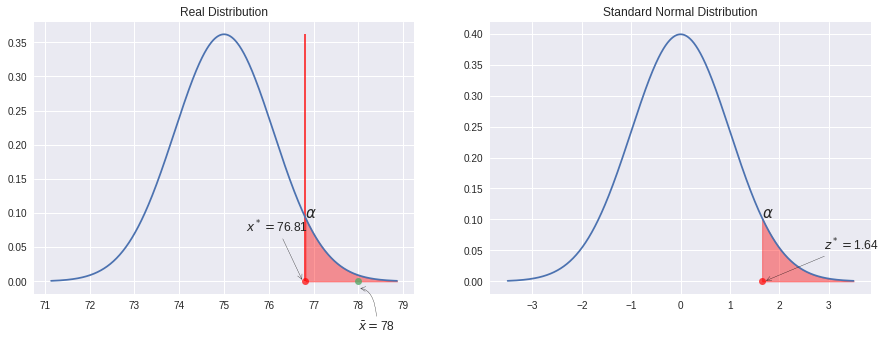

In [0]:
draw2Normal(xbar=78, mu0=75, s=7.721, n=49, alpha=0.05, tails="1-right")

**p-value**:
- Get $p(z>2.72)$ using `1-ss.norm.cdf(2.72)` $\Rightarrow p(z>2.72) = 0.0032$; Compare p-value with $\alpha$

**Rejection Region**:
- Obtain $z^*$ using `ss.norm.ppf(1-alpha)` $\Rightarrow z^* = 1.645$; Compare $z$ with $z^*$

**NOTE**: Both method always lead to the same answer!

4) Draw conclusions.

**p-value**:
>- If the p-value is $< \alpha$, then <span class="assert">reject $H_0$</span>
>- If the p-value is $> \alpha$, then <span class='assert'>fail to reject $H_0$</span>

**Rejection Region**:
>- If $z > z^*$, i.e., the test statistic is _inside_ the rejection region, then <span class="assert">reject $H_0$</span>
>- If $z < z^*$, i.e., the test statistic is _outside of_ the rejection region, then <span class="assert">fail to reject $H_0$</span>
 

In this example, we <span class="assert">reject $H_0$</span>.

In [0]:
# Solve the exercise here:

# Step 0

# Step 1

# Step 2

# Step 3

# Step 4

### <font color="indianred">Questions</font>

1. What does it mean that the test statistic $\bar{x}$ has a $z$ score of $2.72$?
2. Why do we use SE to compute the $z$, as opposed to the sample standard deviation?
3. What does it mean that the p-value is <span class="assert">high</span> or <span class="assert">low</span>?

## <font color="slateblue">p-value: Interpretation</font>

- The p-value is the probability of observing data at least as favorable to $H_a$ as our current sample data (i.e, a sample mean of 78k or more), assuming that $H_0$ is in fact true (i.e., assuming that the true population mean is 75k)
- We can express the p-value as a __conditional probability__:

$$
\text{$p$-value} = p(\bar{x} > 78k | \mu = 75k) = p(z > 2.72) = 0.0032 
$$

### <font color="indianred">Example</font>

A poll by the National Sleep Foundation found that college students average about 7 hours of sleep per night. A sample of 169 college students taking an introductory statistics class yielded an average of 6.88 hours, with a standard deviation of 0.94 hours.

Assuming that this is a random sample representative of all college students (bit of a leap of faith?) , a hypothesis test was conducted to evaluate if college students on average sleep less than 7 hours per night. The p-value for this hypothesis test is 0.0485. Which of the following is correct?

1. Fail to reject $H_0$, the data provide convincing evidence that college students sleep less than 7 hours on average. 
2. Reject $H_0$, the data prove that college students sleep more than 7 hours on average. 
3. Fail to reject $H_0$, the data do not provide convincing evidence that college students sleep less than 7 hours on average.  
4. Reject $H_0$, the data provide convincing evidence that college students in this sample sleep less than 7 hours on average. 


## <font color="slateblue">Two-sided Hypothesis Testing</font>

Assume that the research goal is not to prove that the average amount of sleep of college students is less than 7 hours. Rather, the question is reframed in the following way: We want to test whether there exists enough evidence to claim that the average amount of sleep is <span class="assert">different</span> from the recommended amount of 7 hours per night.

How should the test be formulated?


\begin{equation*}
\begin{cases} 
H_0 : & \mu = 7 \\
H_a : & \mu \neq 7 \hspace1.5cm \text{(regardless of claim)} 
\end{cases}
\end{equation*}

- multiply p-value by two: $p$-value $=2\times 0.0485 = 0.097 > \alpha \Rightarrow$ <span class="assert">Fail to Reject $H_0$</span>; or
- split $\alpha$ over the two sides: We now get two rejection regions, for $\alpha/2=2.5\%$, which leads to $z^* = \pm 1.96 \Rightarrow $ Since $z = \frac{6.88-7}{0.94/\sqrt{169}} = -1.66$, we <span class="assert">Fail to Reject $H_0$</span>.

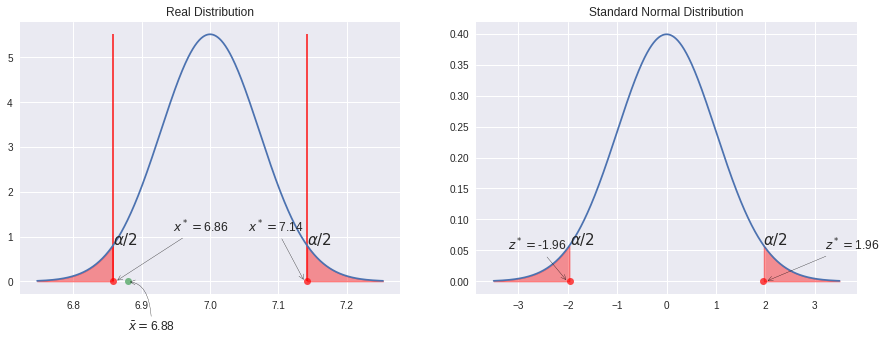

In [0]:
draw2Normal(xbar=6.88, mu0=7, s=0.94, n=169, alpha=0.05, tails="2")

## <font color="slateblue">HT: Stating the Hypotheses</font>

- <span class="assert">One-tail Test</span>: Write claim as alternative hypothesis $H_a$
>- A company advertises that the mean battery life of its batteries is more than 6 hours
\begin{equation*}
\begin{cases} 
H_0 : & \mu \leq 6 \\
H_a : & \mu > 6 \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}
>- A car dealership announces tha the mean time for an oil change is at most 15 minutes
\begin{equation*}
\begin{cases} 
H_0 : & \mu \geq 15 \\
H_a : & \mu < 15 \hspace1.5cm \text{(claim)} 
\end{cases}
\end{equation*}

- <span class="assert">Two-tail Test</span>: Write always $H_0 : \mu = \ldots$ and $H_a : \mu \neq \ldots$, regardless of the claim
>- A school publicizes that the proportion of alumni gettign a job in the first three months after graduation is 85%
\begin{equation*}
\begin{cases} 
H_0 : & p = 0.85 \\
H_a : & p \neq 0.85 \hspace1.5cm \text{(regardless of claim)} 
\end{cases}
\end{equation*}



## <font color="slateblue">Hypothesis Testing: Recap</font>

0. Set the hypotheses (one-tail vs two-tail test)
\begin{equation*}
\begin{cases} 
H_0 : & \mu \geq \ldots\\
H_a : & \mu < \ldots 
\end{cases}
\end{equation*}
1. Assume $H_0$ is true (assume $\mu_0$)
2. Collect sample statistics: $\bar{x}, s, n, SE = \frac{s}{\sqrt{n}}$
3. Compute test statistic $z$ and $p$-value or rejection region
$$z_s = \frac{\bar{x}-\mu_0}{SE}$$
    3.1 $p$-value approach: $p$-value = $p(x < \bar{x}|\mu=\mu_0) = p(z < z_s)$
    
    3.2 Find $z^*$ and $x^*$ defining the rejection region: $z^*$ such that $p(z < z^*) = \alpha$; $x^* = \mu_0 + z^* \times SE$
4. Make decision
>- If $p$-value $< \alpha$ (or $\bar{x}$ is in the rejection region), reject $H_0$
>- If $p$-value $> \alpha$ (or $\bar{x}$ is not in the rejection region), fail reject $H_0$

## <font color="slateblue">Hypothesis Testing: Small Sample</font>

  If the sample size is **small** (i.e., below 30):
- CLT is no longer valid $\Rightarrow$ We require _normality_ of the underlying population
- St.dev. $\sigma$ can no longer be approximated using $s$ within a $z$ statistic $\Rightarrow$ We need to use a t-statistic with $n-1$ df:
$$t = \frac{\overline{x} - \mu}{s/\sqrt{n}}$$
 

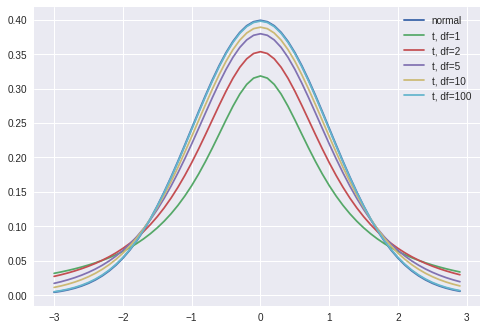

In [0]:
drawT()

 ### Example
 
A car manufacturer wants to test emission level. The mean emission level $\mu$ must be less than 20 ppm of carbon. Ten engines are manufactured for testing. Can we conclude that this type of engine meets the pollution standards? Use $\alpha=0.05$.

<table width="100%" class="centerTable" style="margin: 0px auto;">
<tr>
    <td>15.6 </td><td> 16.2 </td> <td> 22.5 </td> <td> 20.5 </td> <td> 16.4 </td> <td> 19.4 </td> <td> 19.6 </td> <td> 17.9 </td> <td> 12.7 </td> <td> 14.9</td>
</tr>
</table>
 

In [0]:
# Solution here:

## <font color="slateblue">Hypothesis Testing for Population Proportions</font>

- A random sample is selected from a binomial experiment
- The sample size $n$ is large, i.e., both $np_0 \geq 15$ and $nq_0 \geq 15$ hold
- We thus assume CLT holds and we use the normal distribution as a reasonable approximation for the sampling distribution of $\hat{p}$:

$$z = \frac{\hat{p} - p_0}{SE},$$

where $SE = \sqrt{p_0q_0/n}$.



---



**Pepsi Challenge**

  Coca-Cola drinkers participated in a blind taste test where they
  were asked to taste unmarked cups of Pepsi and Coke and select their
  favorite. 

  Pepsi claim: "More than half the Diet Coke drinkers surveyed said they preferred the taste of the Diet Pepsi."

- $n=100$ Diet Coke drinkers
- $x=56$ preferred taste of Diet Pepsi

What can we conclude based on the test?


In [0]:
# SOLUTION HERE


# <font color="slateblue">Decision Errors</font>

- Hypothesis tests are not flawless.
- In the court system innocent people are sometimes wrongly convicted and the guilty sometimes walk free. 
- Similarly, we can make a wrong decision in statistical hypothesis tests as well. 
- The difference is that we have the tools necessary to quantify how often we make errors in statistics.

There are two competing hypotheses: the null and the alternative. In a hypothesis test, we make a decision about which might be true, but our choice might be incorrect. \\

\begin{array}{ll|cc}
& & \textbf{Decision}\\
&  & \text{fail to reject}~H_0 &  \text{reject}~H_0 \\
 \hline
& H_0~\text{true} &\checkmark&  Type~1~Error \\
\textbf{Truth} & H_A~\text{true} & Type~2~Error & \checkmark \\
  \end{array}

- A **Type 1 Error** is rejecting the null hypothesis when $H_0$ is true.
- A **Type 2 Error** is failing to reject the null hypothesis when $H_A$ is true.

- We (almost) never know if $H_0$ or $H_A$ is true, but we need to consider all possibilities.

If we again think of a hypothesis test as a criminal trial then it makes sense to frame the verdict in terms of the null and alternative hypotheses:
\begin{align*}
H_0&:\text{ Defendant is not guilty} \\
H_A&:\text{ Defendant is guilty}
\end{align*}

Which type of error is being committed in the following cirumstances?

- Declaring the defendant not guilty when he is actually guilty $\Rightarrow$ **Type ... error**
- Declaring the defendant guilty when he is actually innocent $\Rightarrow$ **Type ... error**



# <font color="slateblue">Sample Size and Power</font>

\begin{array}{ll|cc}
& & \textbf{Decision}\\
&  & \text{fail to reject}~H_0 &  \text{reject}~H_0 \\
 \hline
& H_0~\text{true} &\checkmark&  Type~1~Error~ (\alpha) \\
\textbf{Truth} & H_A~\text{true} & Type~2~Error~ (\beta)& \checkmark \\
  \end{array}

- Type 1 error is rejecting $H_0$ when you shouldn't have, and the probability of doing so is $\alpha$ (significance level)
- Type 2 error is failing to reject $H_0$ when you should have, and the probability of doing so is $\beta$ (a little more complicated to calculate)
- **Power** of a test is the probability of correctly rejecting $H_0$, and the probability of doing so is $1 - \beta$
- In hypothesis testing, we want to keep $\alpha$ and $\beta$ low, but there are inherent trade-offs.
- Errors and test power can be seen as **conditional probabilities**:
>- $\alpha = p(\text{reject $H_0$|$H_0$ is true})$
>- $\beta = p(\text{fail to reject $H_0$|$H_0$ is false})$
>- power = $1-\beta = p(\text{reject}~H_0|H_0~\text{is false}) \Rightarrow$ Probability of **correctly rejecting** $H_0$  



To compute the power of thte test, we need to follow two steps:


*   **Step 1** : Assuming that $H_0$ is true. Find the rejection region under the null distribution. Depending on whether we have a one-tail or two-tail test, we need to find the value(s) of $\bar{x}^*$ such that the total area in the rejection region is equal to $\alpha$. 
*   **Step 2**: Assume the alternative hypothesis is true. Using the value(s) of $\bar{x}^*$, find $\beta$ as the probability of type II error, i.e., the probability of failing to reject $H_0$, under the assumption that $H_a$ is true. We thus obtain:
$$
\beta = p(\text{fail to reject}~H_0|H_0~\text{is false}) 
$$

You might want to use the simulation below, fixing the values of $\alpha, n, \mu_0$, and $\mu_a$. Plot one function at a time, i.e., first the Null Distribution and then the Alternative Distribution. Try to identify the area associate to $\beta$ and, consequently, to $1-\beta$, i.e., the **Power of the Test**.

Next, observe how the power of the test changes with respect to the following parameters:
* type I error $\alpha$
* sample size $n$
* effect size $\delta$



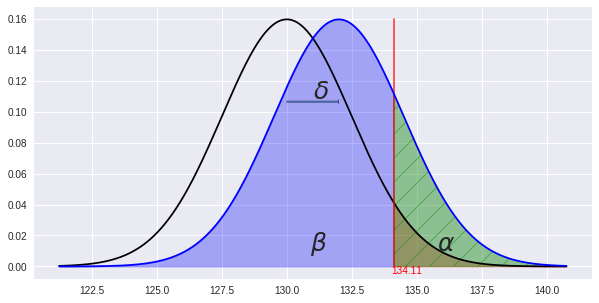

,
,
,
,
,
,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PARAMETER


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VALUE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

δ


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 2.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

α


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 0.05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

z*


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 1.64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

x*


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

134.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

β


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 0.20


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Power


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 0.80


<IPython.core.display.Javascript object>

In [0]:
# define interface
Test_type                = "Ha: >" #@param ["Ha: <", "Ha: >", "Ha: !="]
Null_distribution        = True #@param {type:"boolean"}
Alternative_distribution = True #@param {type:"boolean"}
Power                    = True #@param {type:"boolean"}
mu0                      = 130 #@param {type:"number"}
muA                      = 132 #@param {type:"number"}
stdev                    = 25 #@param {type:"number"}
n                        = 100 #@param {type:"slider", min:2, max:500, step:1}
alpha                    = 0.05 #@param {type:"slider", min:0.001, max:0.99, step:0.001}

# compute Sampling Error
SE = stdev/np.sqrt(n)

# define area for the figure
fig, ax = plt.subplots(figsize=(10, 5))

# set min and max X and generate values for x
minX, maxX = setXAxis(Null_distribution, Alternative_distribution, mu0, muA)
x=np.linspace(minX,maxX,1000)
  
if Null_distribution:
  # plot null distribution and rejection region(s)
  y=ss.norm.pdf(x,loc=mu0,scale=SE)
  #label = "mean=" + str(mu0) + ", stdev=" + str(round(SE,2))
  label = "Null Distribution"
  ax.plot(x,y, label=label, color="black")
  if Test_type == "Ha: !=":
    zstar, xstarL, xstarH = typeI_Error_TwoTails(mu0, alpha, ax, x, y, minX, maxX)
  else:
    zstar, xstar = typeI_Error_OneTail(mu0, alpha, ax, x, y, minX, maxX, Test_type) 
    
if Alternative_distribution:
  y=ss.norm.pdf(x,loc=muA,scale=SE)
  #label = "mean=" + str(muA) + ", stdev=" + str(round(SE,2))
  label = "Alternative Distribution"
  ax.plot(x,y, label=label, color="blue")
  if Test_type == "Ha: !=":
    zstar, xstarL, xstarH, beta = typeII_Error_TwoTails(mu0, muA, alpha, ax, x, y, minX, maxX)
    # print table with results
    printSummary(abs(mu0-muA), alpha, beta, Test_type, xstarL, xstarH)

  else:
    zstar, xstar, beta = typeII_Error_OneTail(mu0, muA, alpha, ax, x, y, minX, maxX)
    # print table with results
    printSummary(abs(mu0-muA), alpha, beta, Test_type, xstar, 0)
    
# plot legend
legend = ax.legend(loc="upper right", shadow=True)

  

## <font color="indianred">Power of the Test: An Example</font>

Blood pressure oscillates with the beating of the heart, and the systolic pressure is defined as the peak pressure when a person is at rest. The average systolic blood pressure for people in the U.S. is about 130 mmHg with a standard deviation of about 25 mmHg.

We are interested in finding out if the average blood pressure of employees at a certain company is **greater** than the national average, so we collect a random sample of 100 employees and measure their systolic blood pressure. What are the hypotheses?

\begin{align*}
H_0&: \mu = 130 \\
H_A&: \mu > 130  
\end{align*}

- We have here a very specific question: "What is the power of this hypothesis test to correctly detect an _increase_ of 2 mmHg in average blood pressure?''

- This is equivalent to asking: "How likely is it that this test will reject $H_0$ when the true average systolic blood pressure for employees at this company is 132 mmHg?"

**Hint**:: Break the problem into two simpler problems:
- **Problem 1**: Which values of $\bar{x}$ represent sufficient evidence to reject $H_0$ (i.e., find $x^*$ that defines the rejection region)?
- **Problem 2**: What is the probability that we would reject $H_0$ if $\bar{x}$ had come from $N\left(mean = 132, SE = \frac{25}{\sqrt{100}} = 2.5\right)$, i.e. what is the probability that we can obtain such an $\bar{x}$ from this distribution?

Use **simulator** above to visualize the solution.





In [0]:
# solution here

## <font color="slateblue">How to Increase the Power of a Test</font>

1. Increase the sample size.
2. Decrease the standard deviation of the sample, which essentially has the same effect as increasing the sample size (it will decrease the standard error). With a smaller $s$ we have a better chance of distinguishing the null value from the observed point estimate. This is difficult to ensure but cautious measurement process and limiting the population so that it is more homogenous may help.
3. Increase $\alpha$, which will make it more likely to reject $H_0$ (but note that this has the side effect of increasing the Type 1 error rate).
4. Consider a larger effect size. If the true mean of the population is in the alternative hypothesis but close to the null value, it will be harder to detect a difference.



## <font color="slateblue"> Using Power to Determine Sample Size</font>

Going back to the blood pressure example, how large a sample would you
need if you wanted 90% power to detect a 4 mmHg increase in average
blood pressure for the hypothesis that the population average is
greater than 130 mmHg at $\alpha = 0.05$?


In [0]:
# solution here